   Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impal

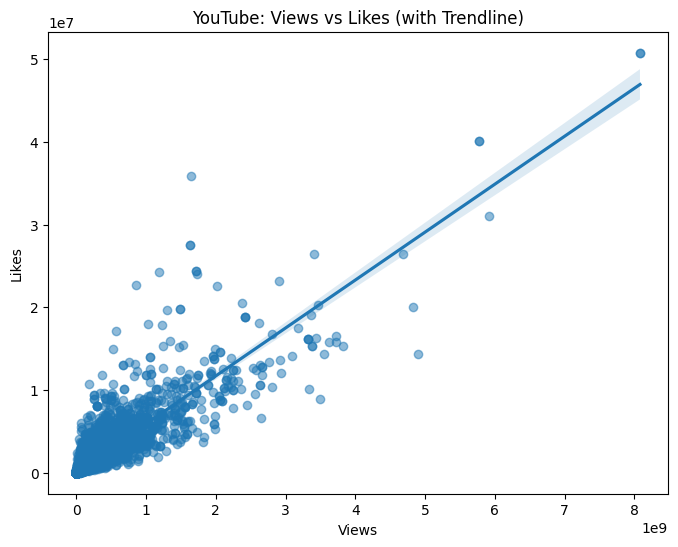

/tmp/ipython-input-4029625527.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_views, x="Views", y="Track", palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL S

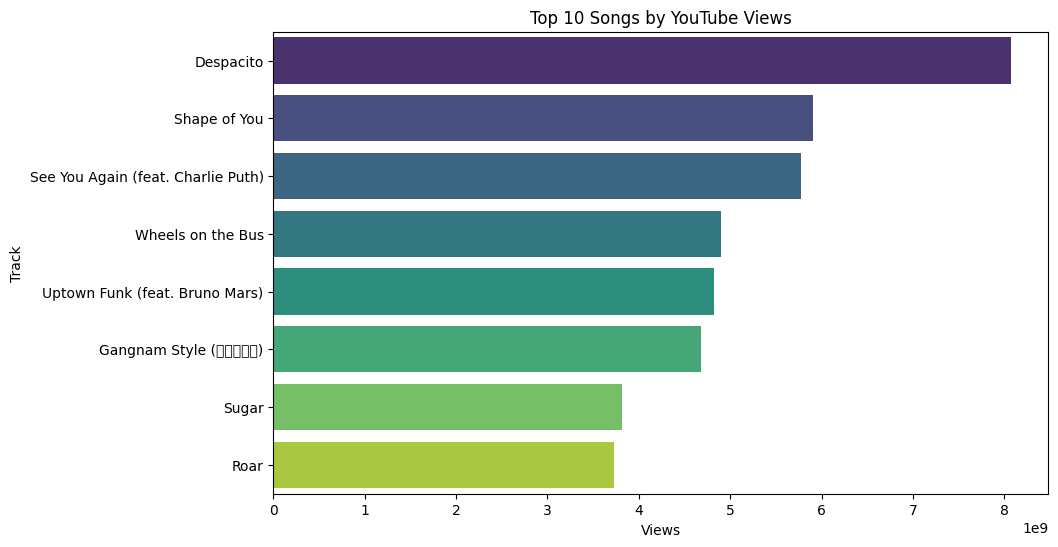

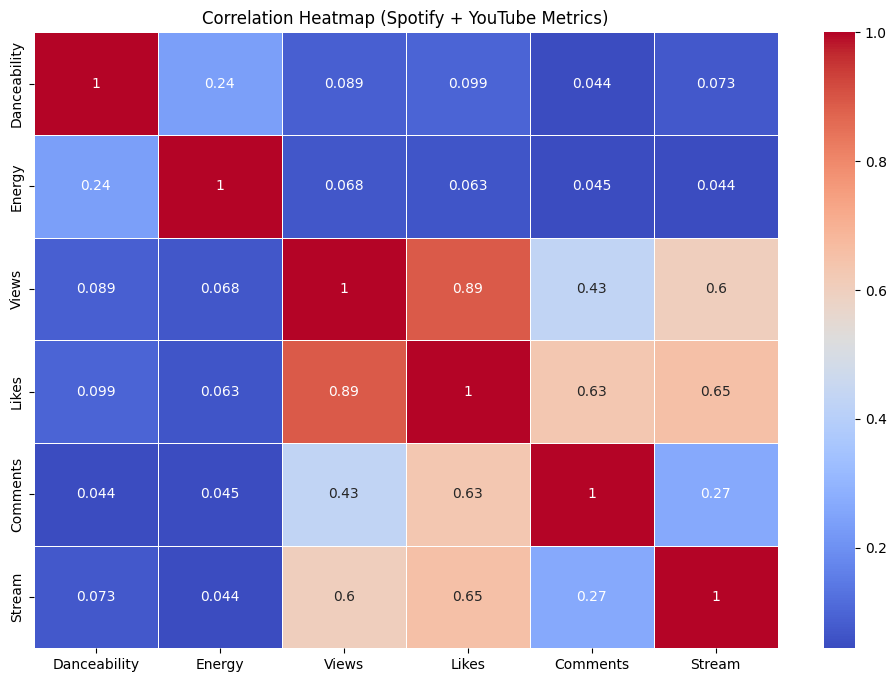

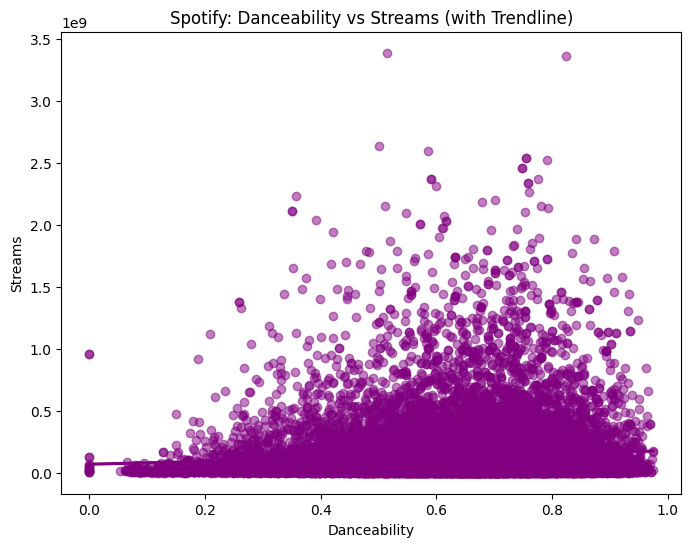

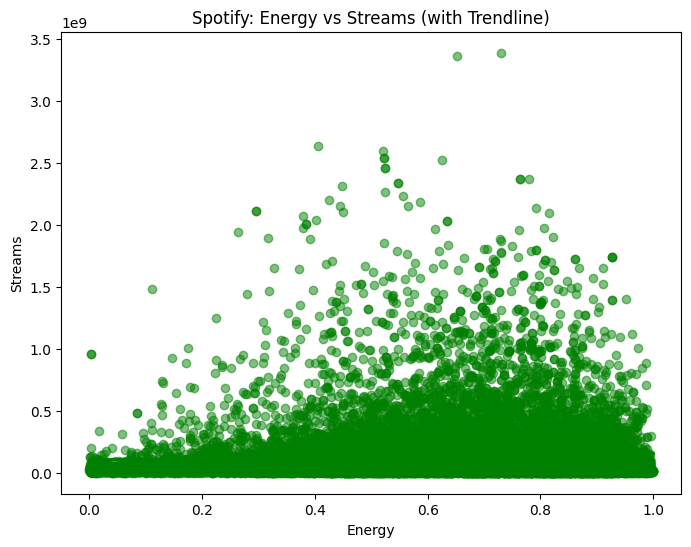

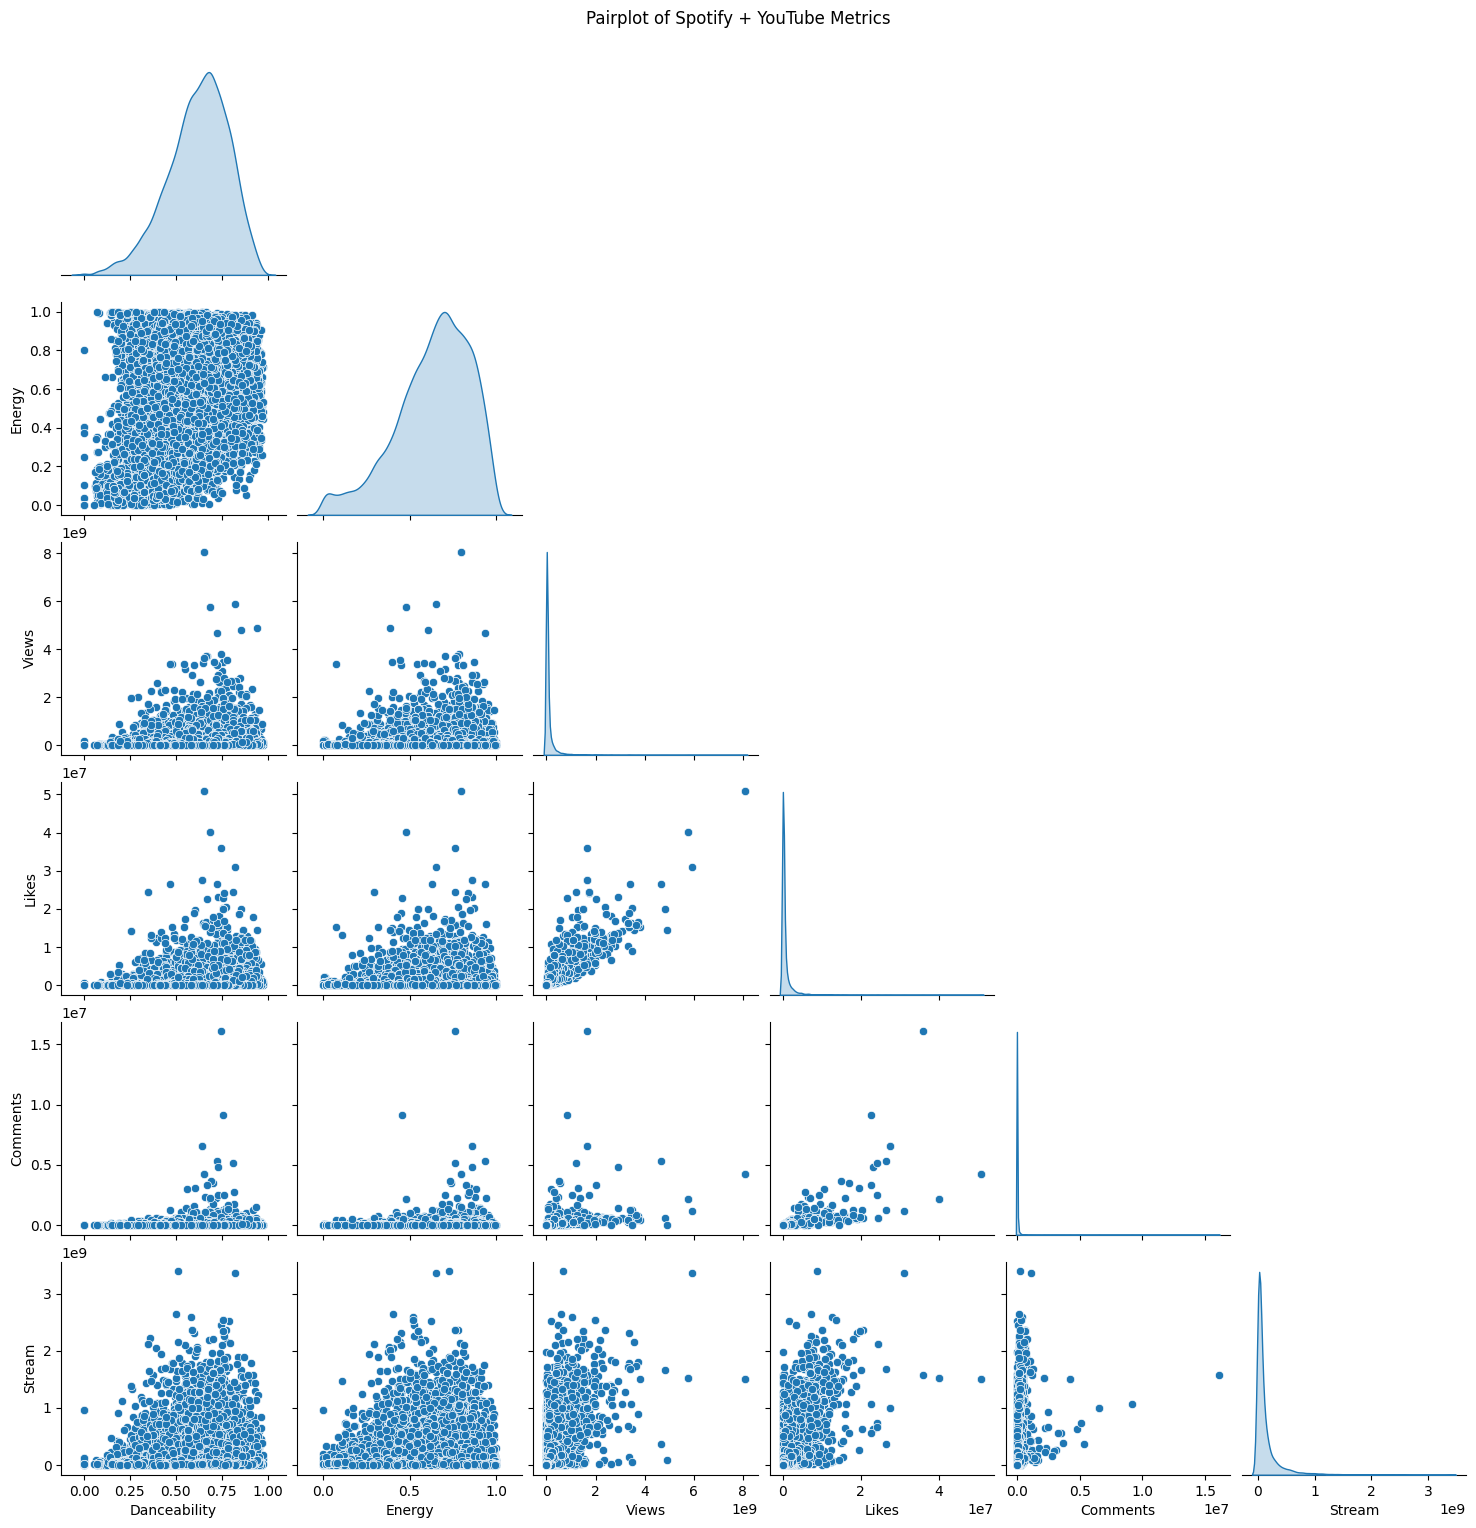

/tmp/ipython-input-4029625527.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=artist_views, x="Views", y="Artist", palette="magma")


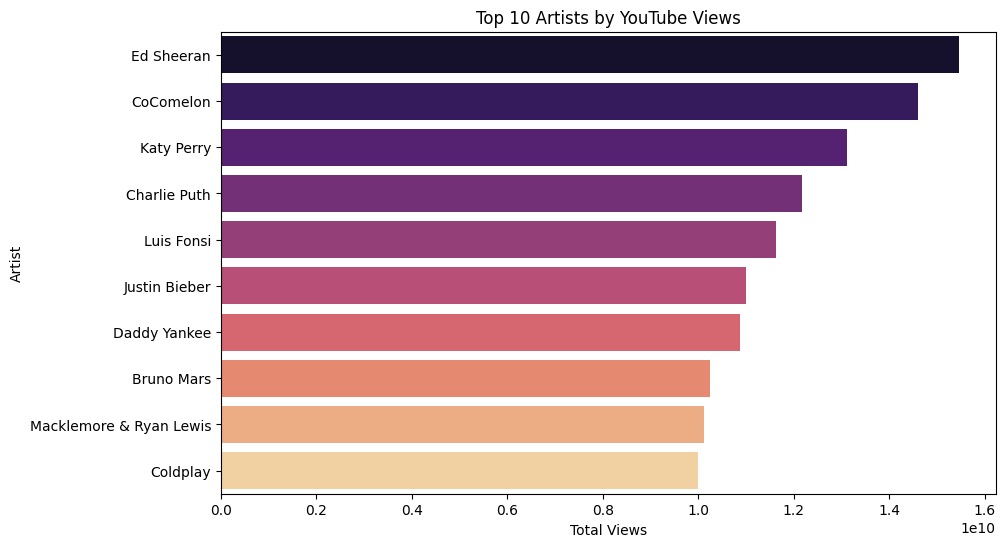

/tmp/ipython-input-4029625527.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=artist_streams, x="Stream", y="Artist", palette="cividis")


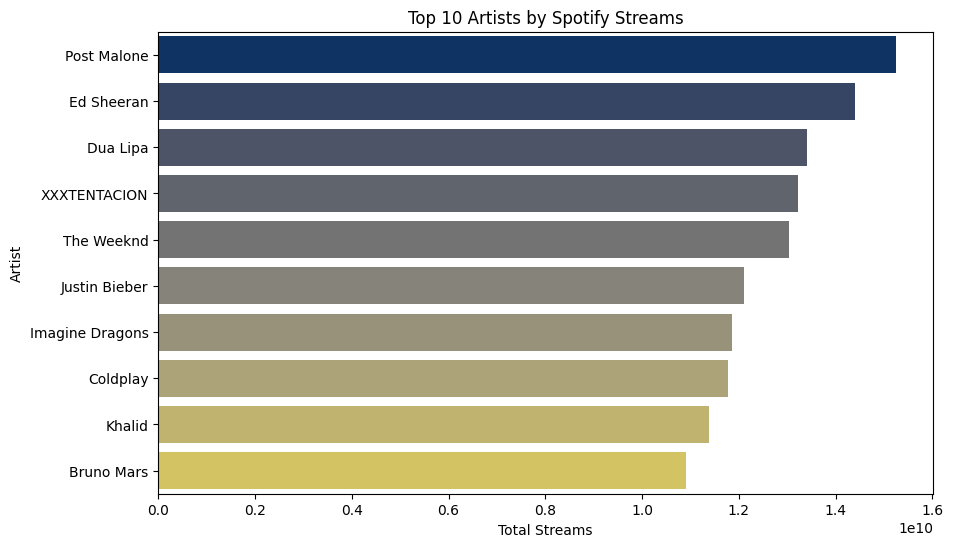

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset
df = pd.read_csv("Spotify_Youtube.csv")

# 3. Quick check
print(df.head())
print(df.columns)

plt.figure(figsize=(8,6))
sns.regplot(data=df, x="Views", y="Likes", scatter_kws={'alpha':0.5})
plt.title("YouTube: Views vs Likes (with Trendline)")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()

# Top 10 Songs by YouTube Views
top10_views = df.nlargest(10, "Views")

plt.figure(figsize=(10,6))
sns.barplot(data=top10_views, x="Views", y="Track", palette="viridis")
plt.title("Top 10 Songs by YouTube Views")
plt.xlabel("Views")
plt.ylabel("Track")
plt.show()

# Correlation Heatmap (Spotify + YouTube metrics)
plt.figure(figsize=(12,8))
sns.heatmap(
    df[["Danceability","Energy","Views","Likes","Comments","Stream"]].corr(),
    annot=True, cmap="coolwarm", linewidths=0.5
)
plt.title("Correlation Heatmap (Spotify + YouTube Metrics)")
plt.show()

# Spotify Insight + Trendline: Danceability vs Streams
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="Danceability", y="Stream", scatter_kws={'alpha':0.5}, color="purple")
plt.title("Spotify: Danceability vs Streams (with Trendline)")
plt.xlabel("Danceability")
plt.ylabel("Streams")
plt.show()

# Spotify Insight + Trendline: Energy vs Streams
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="Energy", y="Stream", scatter_kws={'alpha':0.5}, color="green")
plt.title("Spotify: Energy vs Streams (with Trendline)")
plt.xlabel("Energy")
plt.ylabel("Streams")
plt.show()

# Pairplot (all numeric variables)
sns.pairplot(
    df[["Danceability","Energy","Views","Likes","Comments","Stream"]],
    diag_kind="kde",
    corner=True
)
plt.suptitle("Pairplot of Spotify + YouTube Metrics", y=1.02)
plt.show()

# ================= ARTIST-LEVEL INSIGHTS ================= #

# Top 10 Artists by Total YouTube Views
artist_views = df.groupby("Artist")["Views"].sum().reset_index().sort_values(by="Views", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=artist_views, x="Views", y="Artist", palette="magma")
plt.title("Top 10 Artists by YouTube Views")
plt.xlabel("Total Views")
plt.ylabel("Artist")
plt.show()

# Top 10 Artists by Total Spotify Streams
artist_streams = df.groupby("Artist")["Stream"].sum().reset_index().sort_values(by="Stream", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=artist_streams, x="Stream", y="Artist", palette="cividis")
plt.title("Top 10 Artists by Spotify Streams")
plt.xlabel("Total Streams")
plt.ylabel("Artist")
plt.show()
# 1. Upload file
from google.colab import files
uploaded = files.upload()

# 2. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Load dataset
df = pd.read_csv("Spotify_Youtube.csv")

# 4. Quick check
print(df.head())
print(df.info())

# 5. Top 10 Artists by Spotify Streams
artist_streams = df.groupby("Artist")["Stream"].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=artist_streams,
    x="Stream",
    y="Artist",
    hue="Artist",       # fixes warning
    palette="cividis",
    legend=False        # removes duplicate legend
).set_title("Top 10 Artists by Spotify Streams")
plt.show()

# 6. Top 10 Artists by YouTube Views
artist_views = df.groupby("Artist")["Views"].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=artist_views,
    x="Views",
    y="Artist",
    hue="Artist",
    palette="viridis",
    legend=False
).set_title("Top 10 Artists by YouTube Views")
plt.show()

# 7. Scatter Plot: Streams vs Views
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Stream",
    y="Views",
    alpha=0.6
)
plt.title("Spotify Streams vs YouTube Views")
plt.show()

# 8. Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    df[["Stream", "Views", "Likes", "Comments"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()
